# Project 1: Navigation

The code is structured in the next way:
- Navigation.ipynb: Main function. Just need to run one cell for training or another one for testing with the train model.
- prio_rep_double_dqn_agent.py: Contains the implementation of the agent.
- model2.py: Contains the implementation of the deep neural network with torch.
- prioritized_memory.py: Contains a personalized interface to a custom memory.
- SumTree.py: Contains the particular implementation of the memory used for replay.

Run the next cell to perform the training. Go to the next cell if model import and testing is desired.

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
from collections import deque
import matplotlib.pyplot as plt
from prio_rep_double_dqn_agent import Agent

# Load HEADLESS environment for training, the default brain and reset the environment
env = UnityEnvironment(file_name="Banana_Linux_NoVis/Banana.x86_64")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]
print('Number of agents:', len(env_info.agents))
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

# Create an agent, pass a desired size for the hiden layers.
agent = Agent(state_size=37, action_size=4, hidden_size=2400, seed=0)


# Define dqn algorithm
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.

    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []  # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start  # initialize epsilon
    for i_episode in range(1, n_episodes + 1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(env_info.vector_observations[0], eps)
            env_info = env.step(action)[brain_name]
            next_state, reward, done = env_info.vector_observations[0], env_info.rewards[0], env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
        scores_window.append(score)  # save most recent score
        scores.append(score)  # save most recent score
        eps = max(eps_end, eps_decay * eps)  # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}\tepsilon: {:.2f}\tbeta: {:.2f}'.format(i_episode,
                                                                                          np.mean(scores_window), eps,
                                                                                          agent.memory.memory.beta),
              end="")
        if i_episode % 100 == 0:
            print('\nEpisode {}\tAverage Score: {:.2f}\tepsilon: {:.2f}\tbeta: {:.2f}'.format(i_episode,
                                                                                              np.mean(scores_window),
                                                                                              eps,
                                                                                              agent.memory.memory.beta),
                  end="")
        if np.mean(scores_window) >= 13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode - 100,
                                                                                         np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
        # A small step in learning rate to allow for quicker convergence with above set parameters
        if i_episode == 1200:
            agent.adjust_learning_rate(1200, 2E-5)
    return scores


scores = dqn()

env.close()

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37
Episode 100	Average Score: 0.67	epsilon: 0.61	beta: 0.52
Episode 200	Average Score: 2.13	epsilon: 0.37	beta: 0.54
Episode 300	Average Score: 4.34	epsilon: 0.22	beta: 0.57
Episode 400	Average Score: 5.25	epsilon: 0.13	beta: 0.59
Episode 500	Average Score: 7.08	epsilon: 0.08	beta: 0.61
Episode 600	Average Score: 7.86	epsilon: 0.05	beta: 0.63
Episode 700	Average Score: 9.53	epsilon: 0.03	beta: 0.66
Episode 800	Average Score: 9.89	epsilon: 0.02	beta: 0.68
Episode 900	Average Score: 9.58	epsilon: 0.01	beta: 0.700
Episode 1000	Average Score: 1

<Figure size 640x480 with 1 Axes>

## Plotting the score history (or loading it from our experiments)

Notice that the scores were saved in score.txt. They can be imported as seen in the next cell. We also print here a simple graph with the scores. The algorithm could solve the agent-environment interaction after 1194 episodes, but in reality we observed potential to grow further. See the README section to get to know more.

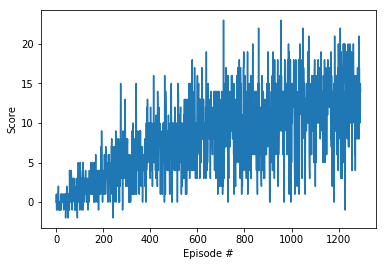

"\n#To get the saved scores into a list we can just run the next code\n\ni_scores = []\nwith open('scores.txt', 'r') as f:  \n    for line in f:\n        # remove linebreak which is the last character of the string\n        val = line[:-1]\n        # add item to the list\n        i_scores.append(val)\n"

In [14]:
%matplotlib inline
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# Save scores
with open('scores.txt', 'w') as f:
    for item in scores:
        f.write("%f\n" % item)
"""
#To get the saved scores into a list we can just run the next code

i_scores = []
with open('scores.txt', 'r') as f:  
    for line in f:
        # remove linebreak which is the last character of the string
        val = line[:-1]
        # add item to the list
        i_scores.append(val)
"""

## Loading pretrained model and testing only

Run the next cell for testing only. Notice that we are re loading the environment, this time the version with visual interface attached. Also our pretrained model is being loaded into an agent instance and used for the loop.

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
from prio_rep_double_dqn_agent import Agent

env = UnityEnvironment(file_name="Banana_Linux/Banana.x86_64")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

chp = torch.load('checkpoint.pth')
agent = Agent(state_size=37, action_size=4, hidden_size=2400, seed=0, checkpoint = chp)

env_info = env.reset(train_mode=False)[brain_name]  # reset the environment
state = env_info.vector_observations[0]  # get the current state
score = 0  # initialize the score

while True:
    action = agent.act(state)  # select an action
    env_info = env.step(action)[brain_name]  # send the action to the environment
    next_state = env_info.vector_observations[0]  # get the next state
    reward = env_info.rewards[0]  # get the reward
    done = env_info.local_done[0]  # see if episode has finished
    score += reward  # update the score
    print('\rScore: {:.2f}'.format(score),end="")
    state = next_state  # roll over the state to next time step
    if done:  # exit loop if episode finished
        break

env.close()

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37
Score: 16.00